In [2]:
import intake
import healpix as hp
import cmocean
import numpy as np
import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
try:
    import easygems.healpix as egh
except:
    %pip install easygems


In [3]:
cat = intake.open_catalog("https://tcodata.mpimet.mpg.de/internal.yaml")
list(cat)

['BCO', 'METEOR', 'ORCESTRA', 'HERA5', 'HIFS', 'airinfo']

In [6]:
era5 = cat.HERA5(time="PT1H").to_dask().pipe(egh.attach_coords)

In [12]:
#print(era5.info())

xarray.Dataset {
dimensions:
	time = 120504 ;
	cell = 196608 ;
	level = 29 ;

variables:
	float32 100u(time, cell) ;
		100u:levtype = surface ;
		100u:long_name = 100 metre U wind component ;
		100u:standard_name =  ;
		100u:type = analysis ;
		100u:units = m s**-1 ;
	float32 100v(time, cell) ;
		100v:levtype = surface ;
		100v:long_name = 100 metre V wind component ;
		100v:standard_name =  ;
		100v:type = analysis ;
		100v:units = m s**-1 ;
	float32 10u(time, cell) ;
		10u:levtype = surface ;
		10u:long_name = 10 metre U wind component ;
		10u:standard_name =  ;
		10u:type = analysis ;
		10u:units = m s**-1 ;
	float32 10v(time, cell) ;
		10v:levtype = surface ;
		10v:long_name = 10 metre V wind component ;
		10v:standard_name =  ;
		10v:type = analysis ;
		10v:units = m s**-1 ;
	float32 2d(time, cell) ;
		2d:levtype = surface ;
		2d:long_name = 2 metre dewpoint temperature ;
		2d:standard_name =  ;
		2d:type = analysis ;
		2d:units = K ;
	float32 2t(time, cell) ;
		2t:levtype = surfa

In [13]:
i_bco = hp.ang2pix(
    egh.get_nside(era5),
    -59.42875, # longitude at BCO
    13.16264, # latitude at BCO
    nest=egh.get_nest(era5),
    lonlat=True,
)

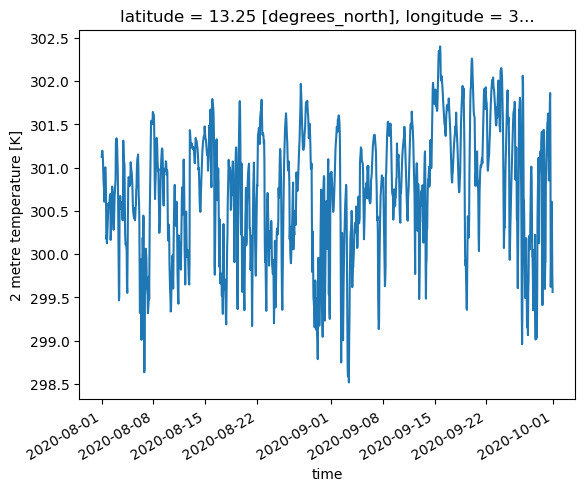

In [14]:
era5["2t"].sel(cell=i_bco, time=slice("2020-08", "2020-09")).plot()
